<a href="https://colab.research.google.com/github/shetehm/Rental-Bike-Demand-Prediction/blob/main/Individual_Colab_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised ML Regression Project/SeoulBikeData.csv', encoding='unicode_escape')

In [ ]:
#Keeping a copy of original dataset
original_dataset= dataset.copy()

# **Knowing about Dataset**

In [ ]:
dataset.shape

(8760, 14)

In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are no null values in any of the columns.

In [ ]:
len(dataset[dataset.duplicated()])

0

There are no duplicate rows in the dataset

In [ ]:
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,26/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# **Exploratory Data Analysis**

Let's look at the distributions of the variables

In [ ]:
dataset[dataset['Rented Bike Count']==0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


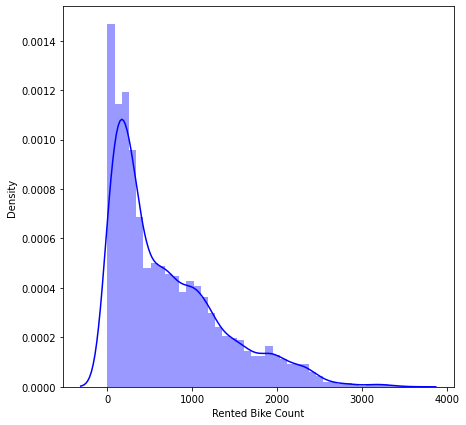

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Rented Bike Count'],color="b")

In [ ]:
from scipy.stats import skew
skew(dataset['Rented Bike Count'])

1.1532306631480034

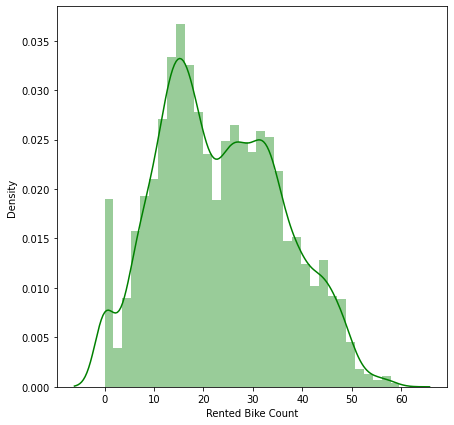

In [ ]:
#To normalize the distribution applying the log tranformation
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(dataset['Rented Bike Count']),color="g")
#sns.distplot(np.log10(max(dataset['Rented Bike Count']+1)- dataset['Rented Bike Count']),color="g")

In [ ]:
skew(np.sqrt(dataset['Rented Bike Count']))

0.23732144485836718

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

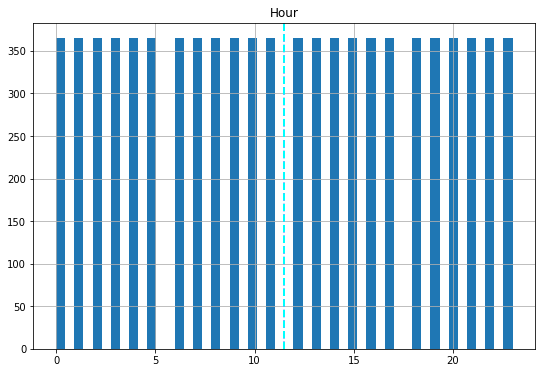

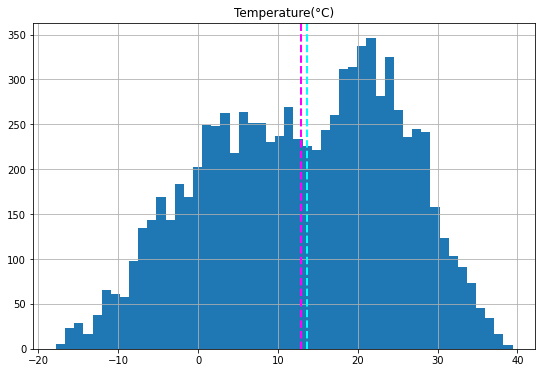

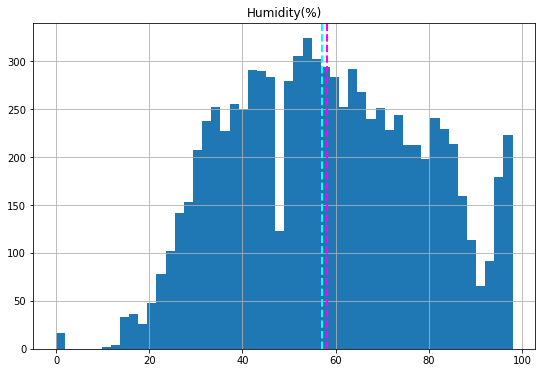

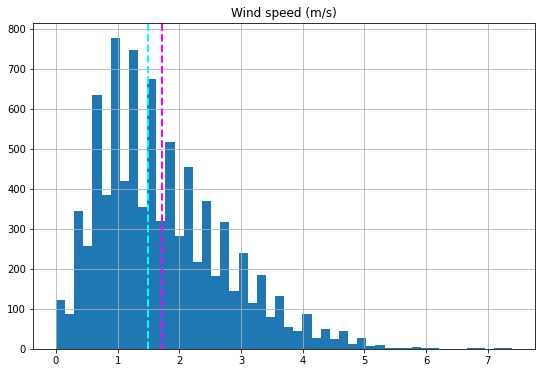

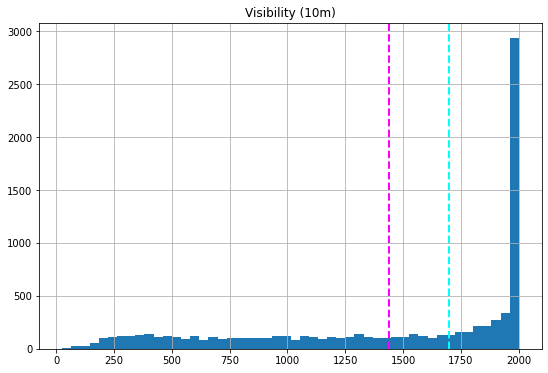

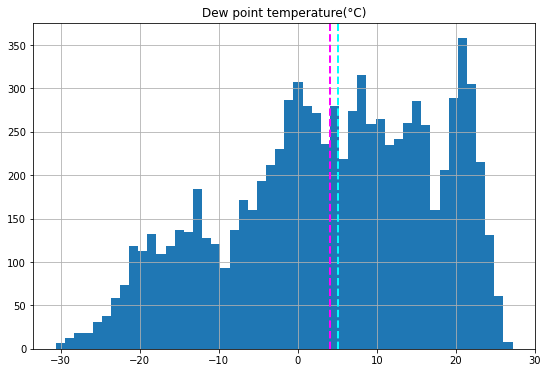

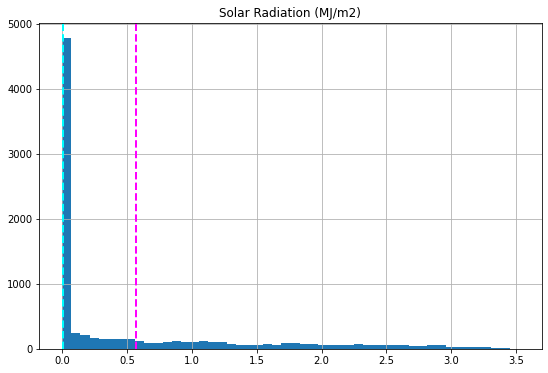

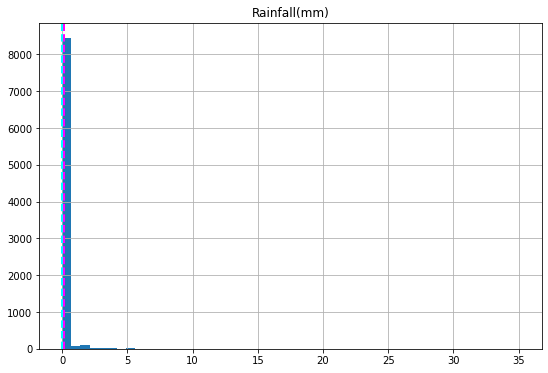

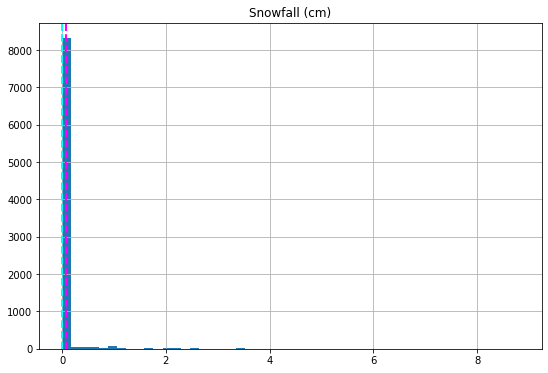

In [ ]:
#Plotting distributions for all numeric features
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

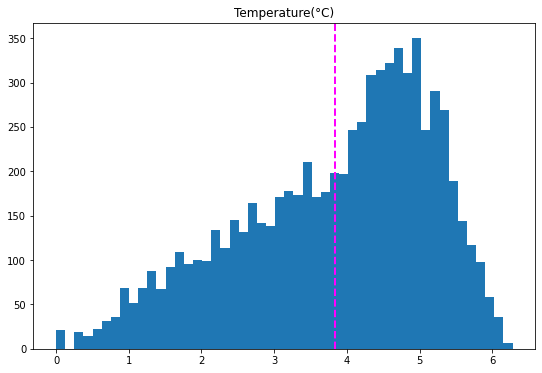

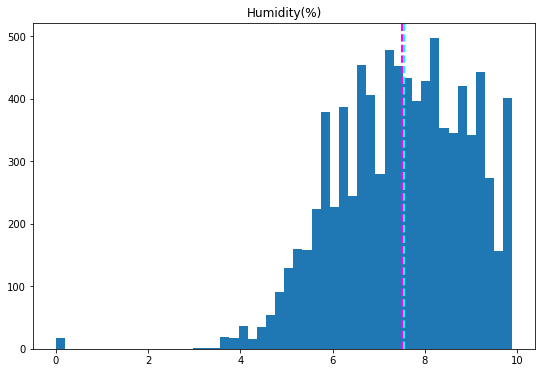

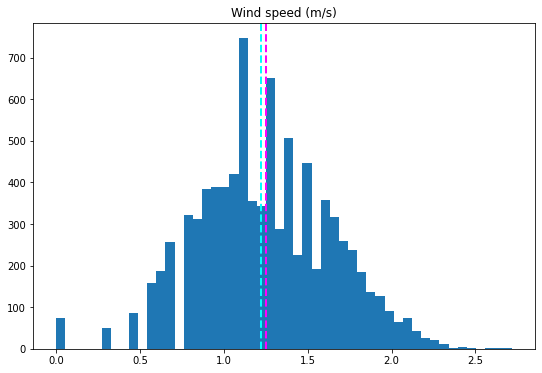

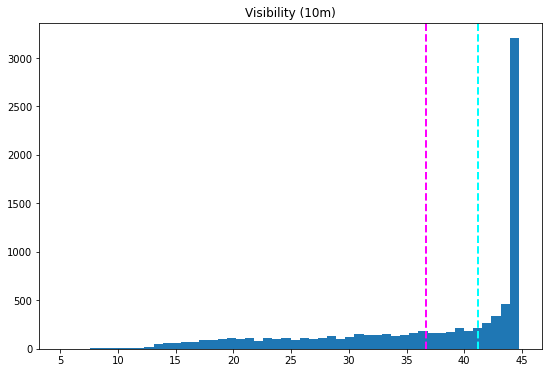

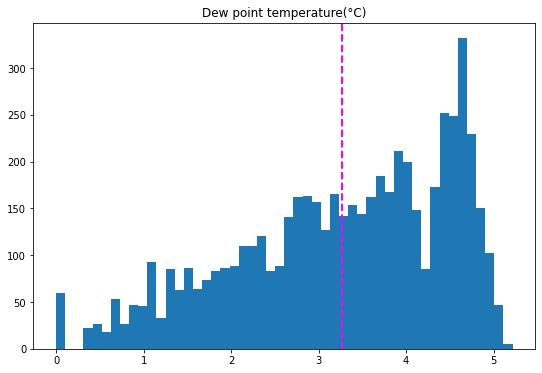

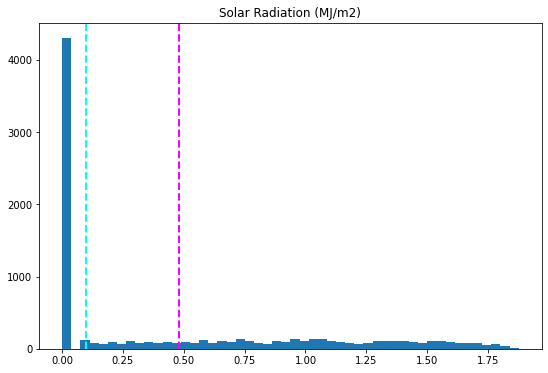

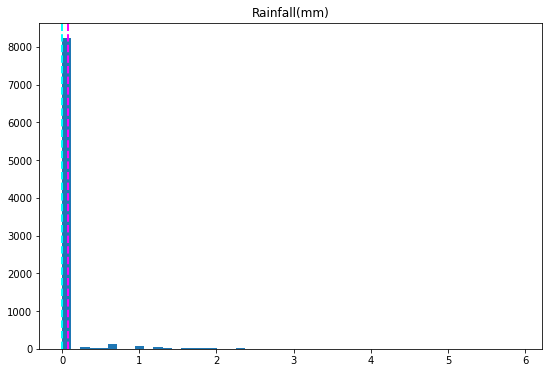

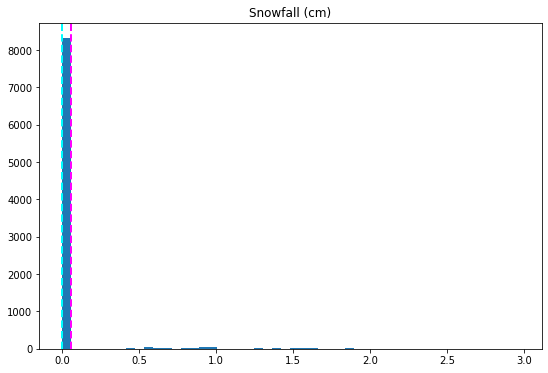

In [ ]:
#Applying z trnasformtion to normalize the feature distributions
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    plt.hist(feature, bins=50)
    #feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(np.median(feature), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

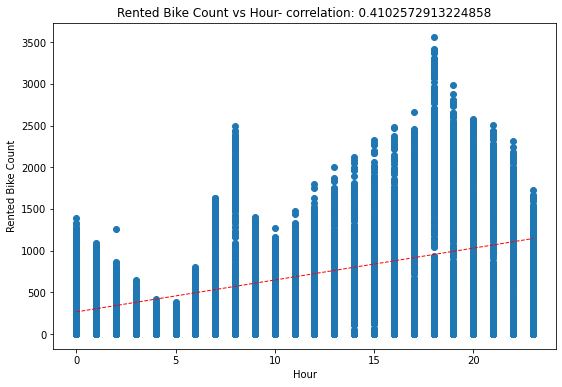

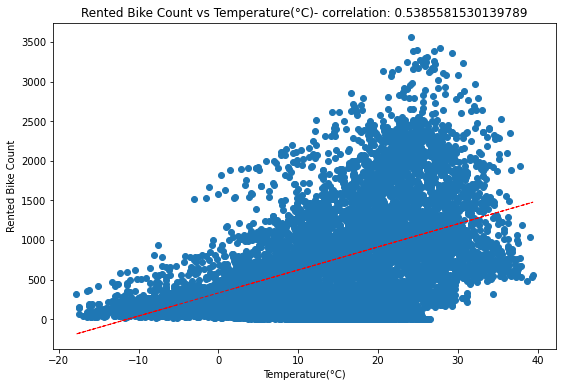

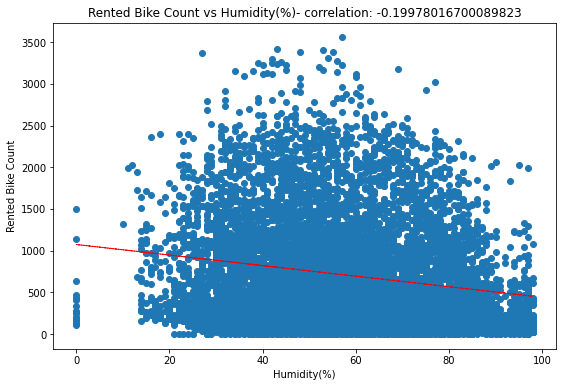

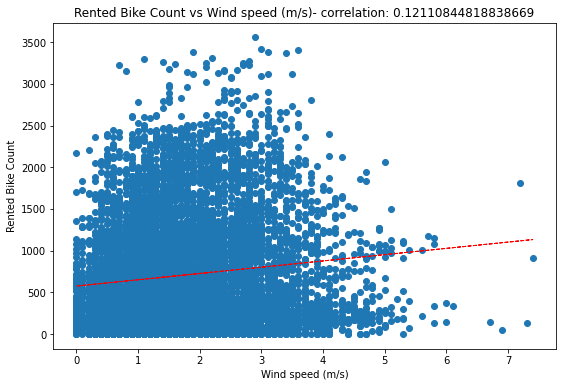

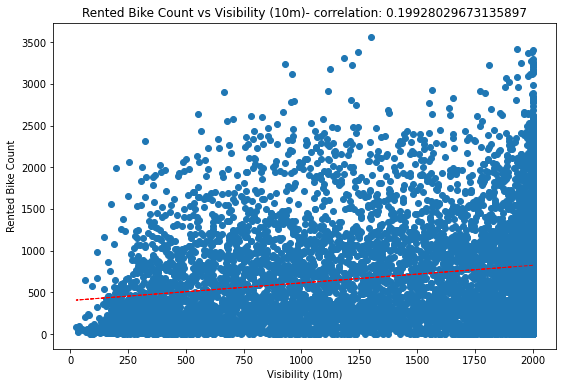

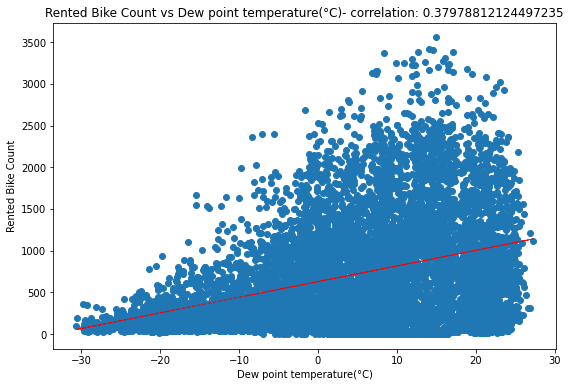

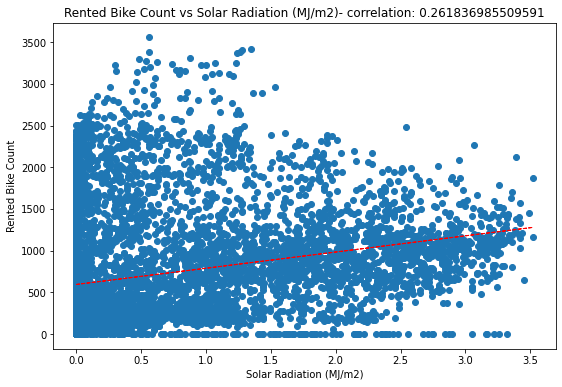

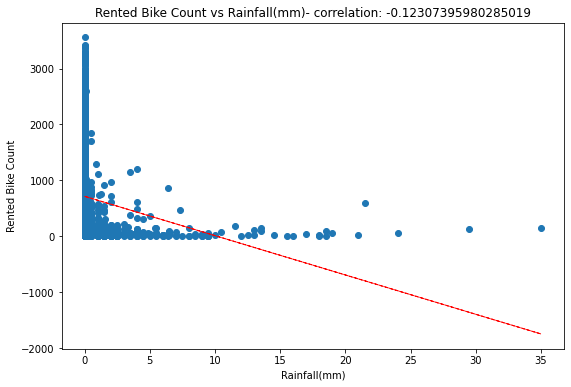

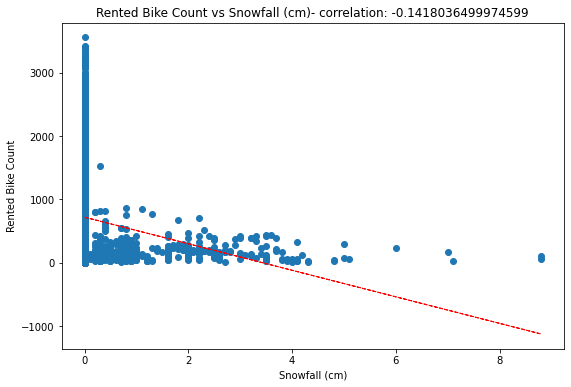

In [ ]:
#Checking the relation between dependent variable and other numeric variables
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

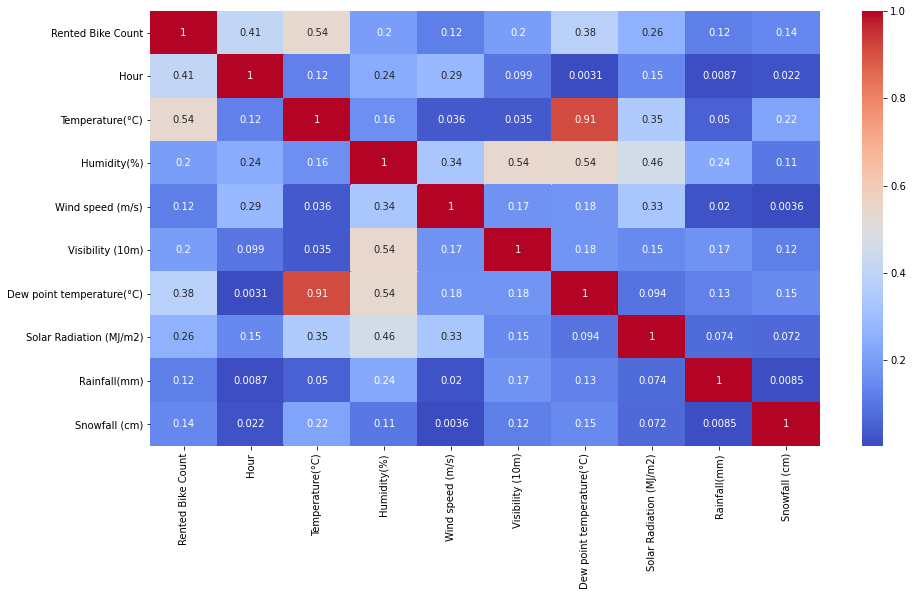

In [ ]:
#Checking Correlation between features
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Strong Correlation:** (Temperature and Dew point temperature), (Humidity, Dew point temperature), (Visibility, Humidity)

**Moderate Correlation:** (Wind Speed, Temperature), (Wind Speed, Humidity), (Visibility, Temperature), (Solar Radiation, Temperature), (Solar Radiation, Humidity), (Solar Radiation, Wind Speed)

## **Handling Multicolinearity**

In [ ]:
#Calculating VIF i.e. Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


VIF less than 5 indicates the permissible level of collinearity

In [ ]:
#Updating the list of numeric features
numeric_features= ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [ ]:
categorical_features = dataset.describe(include=['object']).columns
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

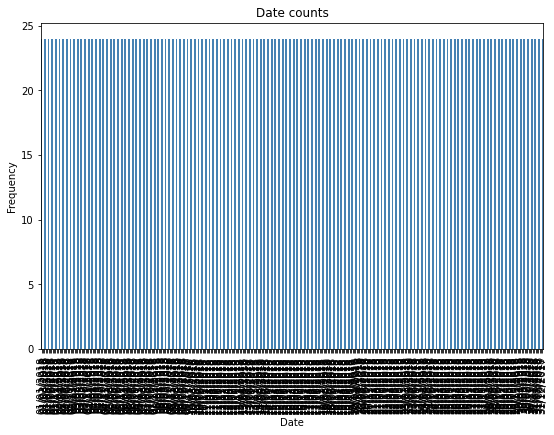

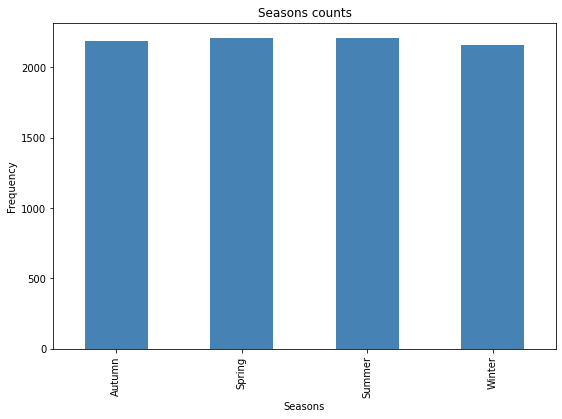

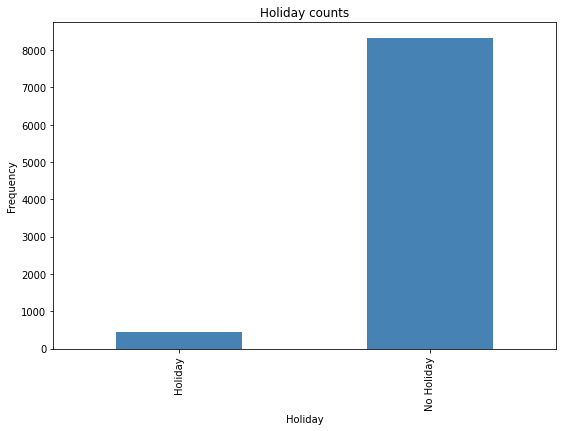

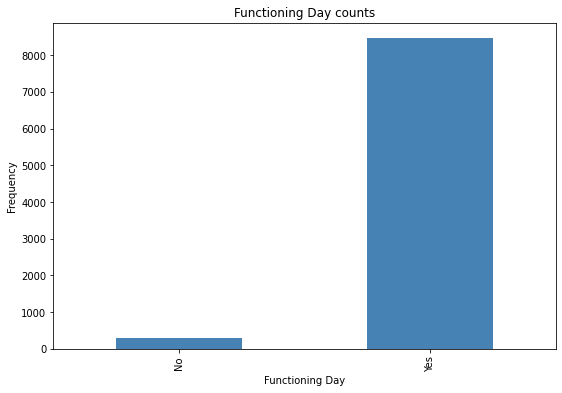

In [ ]:
#Checking the frequency of vaules in categorical features
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
dataset.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

There are zero bikes rented on non-funtioning day as services were unavailable on these days. Thus, there are only functioning days on which we have values for Dependennt variable and we can exclude this column from analysis and rows with Non functioning day can be excluded.

In [ ]:
#Keeping rows only with functioning day
dataset= dataset[dataset['Functioning Day'] == 'Yes']
dataset.shape

(8465, 14)

In [ ]:
dataset.groupby('Holiday')['Rented Bike Count'].sum()

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

There are significant number of bikes booked on both 'Holiday' and 'No Holiday' days, thus considering 'Holiday' column for modelling

In [ ]:
#Creating New Column Month from Date Values
dataset['Month']= dataset['Date'].apply(lambda x: 'January' if x[3:5]== '01' else 'February' if x[3:5]== '02' else 'March' if x[3:5]== '03'
                                else 'April' if x[3:5]== '04' else 'May' if x[3:5]== '05' else 'June' if x[3:5]== '06' else 'July' if x[3:5]== '07'
                                else 'August' if x[3:5]== '08' else 'September' if x[3:5]== '09' else 'October' if x[3:5]== '10'
                                else 'November' if x[3:5]== '11' else 'December' )

In [ ]:
dataset.groupby('Month')['Rented Bike Count'].sum()

Month
April        524227
August       651887
December     185330
February     151833
January      150006
July         734460
June         896887
March        380594
May          707088
November     465715
October      650675
September    673612
Name: Rented Bike Count, dtype: int64

In [ ]:
dataset['Month'].value_counts()

March        744
July         744
August       744
January      744
December     744
June         720
May          720
April        696
February     672
October      665
November     648
September    624
Name: Month, dtype: int64

In [ ]:
dataset.groupby('Seasons')['Rented Bike Count'].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

In [ ]:
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
categorical_features = dataset.describe(include=['object']).columns
categorical_features= categorical_features.to_list()
categorical_features.remove('Date')
categorical_features.remove('Functioning Day')
(categorical_features)

['Seasons', 'Holiday', 'Month']

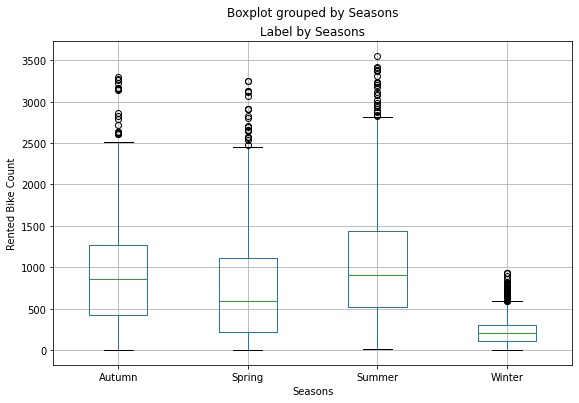

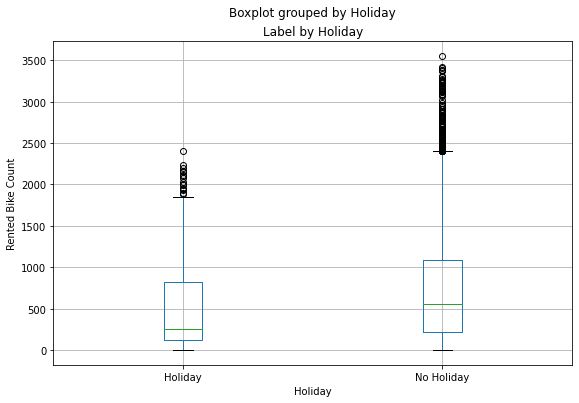

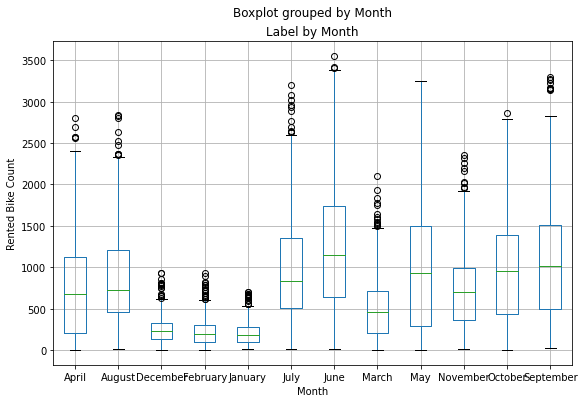

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [ ]:
dataset_pr= dataset.copy()
dataset_pr.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December


In [ ]:
#Label Encoding
encoding_nums = {
            'Holiday': {'No Holiday': 0, 'Holiday':1},
          }
dataset_pr= dataset_pr.replace(encoding_nums)

In [ ]:
#One hot coding
dataset_pr= pd.get_dummies(dataset_pr, columns=['Month', 'Seasons'], prefix=['Month', 'Season'])
#dataset_pr= pd.get_dummies(dataset_pr, columns=['Seasons'], prefix=['Season'])

In [ ]:
dataset_pr.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,Yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dataset_pr.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [ ]:
#features=[]
features= numeric_features.copy()
features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
features.extend(['Holiday', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter'])

In [ ]:
len(features)

25

In [ ]:
features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Season_Autumn',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter']

In [ ]:
#Applying Transformaations to features and dependent variable to normalize them
#X = dataset_pr[features] #.apply(stats.zscore)
#X = np.log10(dataset[features])
#y = dataset_pr['Rented Bike Count']
X= stats.zscore(dataset_pr[features])
y= stats.zscore(dataset_pr['Rented Bike Count'])

In [ ]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6772, 25)
(1693, 25)


In [ ]:
type(y_train)

numpy.ndarray

**Linear Regression**

In [ ]:
#Fitting Train data using linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.5837415295713826

In [ ]:
reg.coef_

array([ 3.08399289e-01,  5.76534873e-01, -2.45810587e-01,  3.46833217e-02,
        5.06192741e-02, -1.32688601e-01, -1.10837023e-01,  2.41318232e-02,
       -4.59051744e-02, -6.22215081e+10,  1.55590083e+10, -6.30339721e+10,
       -6.01850195e+10, -6.30339721e+10,  1.55590083e+10,  1.53297696e+10,
       -6.41322677e+10, -6.31873747e+10,  3.16772044e+10,  3.20551204e+10,
        3.11327375e+10,  1.32079119e+10,  1.64394749e+11,  4.19911797e+10,
        1.62703664e+11])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  mean_absolute_error

#MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

#MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.40437553434872875
MAE : 0.47847422128790595
RMSE : 0.6359052872470308


In [ ]:
from sklearn.metrics import r2_score
#r2 = r2_score(10**(y_test), 10**(y_pred))
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5755140273485974
Adjusted R2 :  -0.015885505528522526


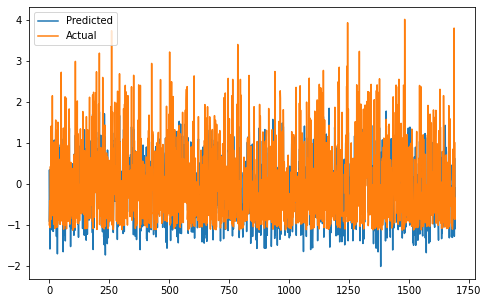

In [ ]:
plt.figure(figsize=(8,5))
#plt.plot(10**(y_pred))
#plt.plot(np.array(10**(y_test)))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Preparing the Dataset for Decision Tree, Random Forest and XGBOOST**

In [ ]:
Copy_dataset= original_dataset.copy()

#Keeping rows only with functioning day
Copy_dataset= Copy_dataset[Copy_dataset['Functioning Day'] == 'Yes']
#DT_dataset.shape

#Creating New Column Month from Date Values
Copy_dataset['Month']= Copy_dataset['Date'].apply(lambda x: 'January' if x[3:5]== '01' else 'February' if x[3:5]== '02' else 'March' if x[3:5]== '03'
                                else 'April' if x[3:5]== '04' else 'May' if x[3:5]== '05' else 'June' if x[3:5]== '06' else 'July' if x[3:5]== '07'
                                else 'August' if x[3:5]== '08' else 'September' if x[3:5]== '09' else 'October' if x[3:5]== '10'
                                else 'November' if x[3:5]== '11' else 'December')

#Label Encoding
encoding_nums = {
            'Holiday': {'No Holiday': 0, 'Holiday':1},
          }
Copy_dataset= Copy_dataset.replace(encoding_nums)

#One hot coding
Copy_dataset= pd.get_dummies(Copy_dataset, columns=['Month', 'Seasons'], prefix=['Month', 'Season'])
#dataset_pr= pd.get_dummies(dataset_pr, columns=['Seasons'], prefix=['Season'])

dependent_variable= 'Rented Bike Count'
independent_variables= ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter']

X= Copy_dataset[independent_variables]
y= Copy_dataset[dependent_variable]

#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

# **Decision Tree**

In [ ]:
#Create a regressor object
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(random_state = 0, max_depth= 7)

DT_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_predicted_train= DT_regressor.predict(X_train)
r2_score(y_train,y_predicted_train)

0.83629467061555

In [ ]:
y_predicted_test= DT_regressor.predict(X_test)
r2_score(y_test,y_predicted_test)

0.7754335867819555

In [ ]:
#Using Grid Search to get the best set hyper parameters
from sklearn.model_selection import GridSearchCV
parameter_grid ={"splitter":["best","random"],
            "max_depth" : [5,7,9,11],
           "min_samples_leaf":[3,4,5,6,7,8],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto"],
           "max_leaf_nodes":[30,40,50,60,70] }

tuned_model= GridSearchCV(DT_regressor,param_grid=parameter_grid,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuned_model.estimator

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
tuned_model.fit(X_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best, score=-105150.017, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best, score=-113852.204, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best, score=-120768.704, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=random, score=-145219.022, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best, score=-113923.230, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best, score=-120534.521, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random, score=-145207.661, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random, score=-146045.770, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random, score=-152158.962, total=   0.0s

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   11.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=7, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 7, 9, 11], 'max_features': ['auto'],
                         'max_leaf_nodes': [30, 40, 50, 60, 70],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8

In [ ]:
train_preds =  tuned_model.predict(X_train)
test_preds  = tuned_model.predict(X_test)

In [ ]:
r2_score(y_train,train_preds)

0.8513854906705098

In [ ]:
r2_score(y_test,y_predicted_test)

0.7754335867819555

## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Creating object of Random Forest Regressor
RF_regressor= RandomForestRegressor(n_estimators= 1000, random_state= 0, criterion= 'mse', max_features= 'auto', max_depth=7)

RF_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_predicted_train= RF_regressor.predict(X_train)
r2_score(y_train,y_predicted_train)

0.8702645087935925

In [ ]:
y_predicted_test= RF_regressor.predict(X_test)
r2_score(y_test,y_predicted_test)

0.822641112835649

In [ ]:
param_grid = { 
            "n_estimators"      : [100, 300],
            "max_features"      : ["auto", "sqrt", "log2"]
            }
RF_regressor = GridSearchCV(RF_regressor, param_grid, n_jobs=-1, cv=5)

In [ ]:
RF_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=7,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=1000, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [ ]:
y_predicted_train= RF_regressor.predict(X_train)
r2_score(y_train,y_predicted_train)

0.8697589225771534

In [ ]:
y_predicted_test= RF_regressor.predict(X_test)
r2_score(y_test,y_predicted_test)

0.8223703388531654

# **XGBoost Regressor**

In [ ]:
import xgboost as xgb
xgb_regressor= xgb.XGBRegressor(max_depth=5)
xgb_regressor.fit(X_train, y_train)

[18:34:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_predicted_train= xgb_regressor.predict(X_train)
r2_score(y_train,y_predicted_train)

0.9235024558203069

In [ ]:
y_predicted_test= xgb_regressor.predict(X_test)
r2_score(y_test,y_predicted_test)

0.8673114631816541

In [ ]:
xgb_regressor.feature_importances_

array([0.10172983, 0.18175417, 0.04914227, 0.00485845, 0.00468506,
       0.0176646 , 0.08378904, 0.10452334, 0.00464772, 0.01967072,
       0.00603264, 0.01858006, 0.0036007 , 0.00077341, 0.00328318,
       0.00699933, 0.03137108, 0.0278953 , 0.01861142, 0.00720851,
       0.06451709, 0.00511956, 0.15549798, 0.0531744 , 0.00370705,
       0.0211631 ], dtype=float32)

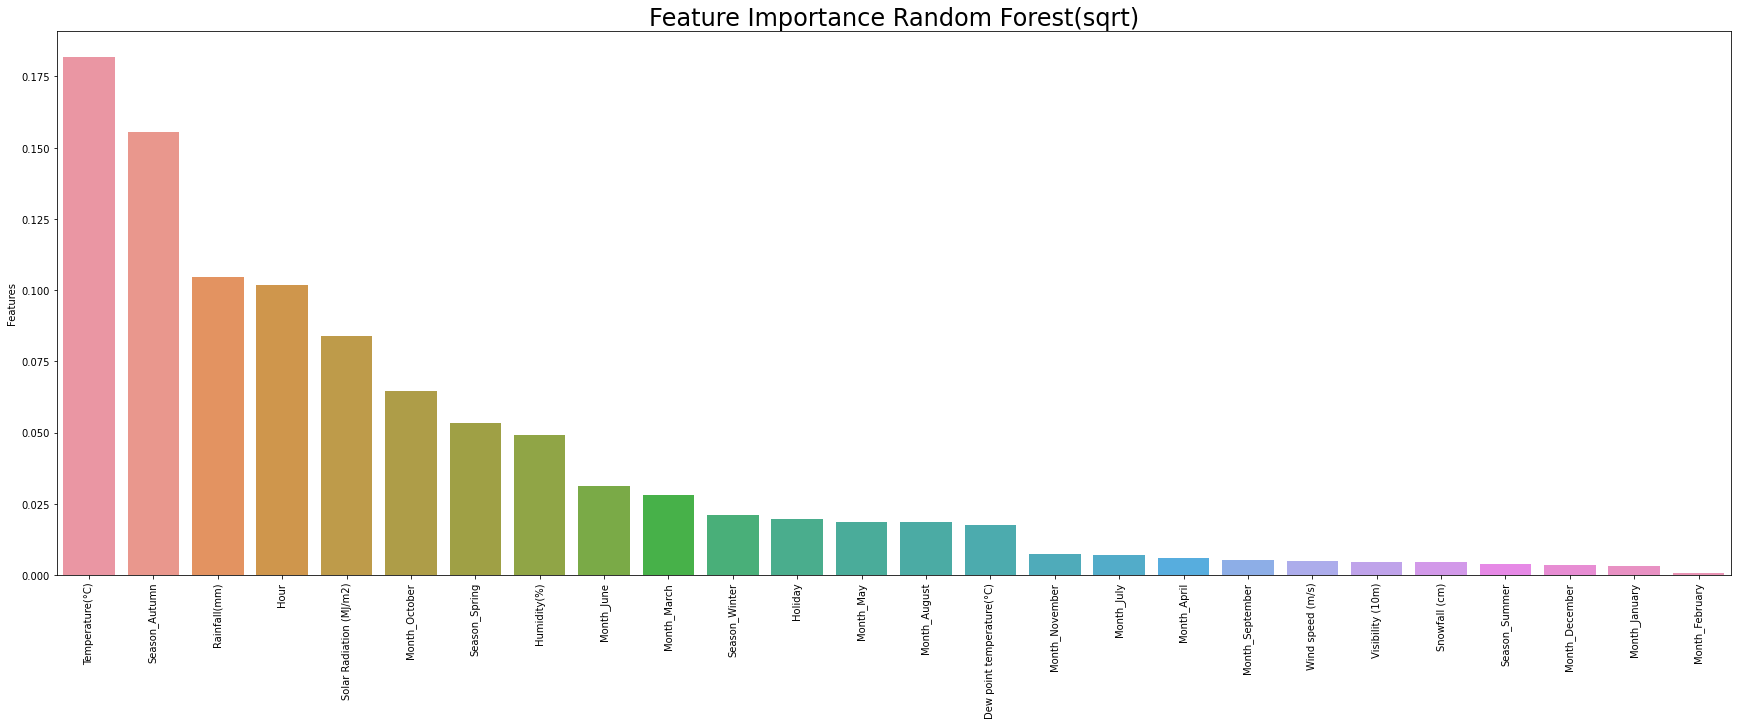

In [ ]:
# Feature Importance plot
dictionary = dict(zip(X_train.columns.to_list(), list(xgb_regressor.feature_importances_)))
your_df_from_dict=pd.DataFrame.from_dict(dictionary,orient='index')

your_df_from_dict.sort_values(by=0,ascending=False,inplace=True)
your_df_from_dict.rename(columns= {0 :'Features'},inplace=True)

fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.barplot(x=your_df_from_dict.index, y='Features', data=your_df_from_dict)
ax.set_title( "Feature Importance Random Forest(sqrt)" , size = 24 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('Feature Importance 3.png')

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 30.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=2c09a16ccf7b217059817286b6bd8b9d0be08d35f4cfa453bcd15d44571a3c6c
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap
shap.initjs()

# Library to suppress warnings1
import warnings
warnings.filterwarnings('ignore')


In [ ]:
explainer = shap.TreeExplainer(xgb_regressor)

In [ ]:
shap_values = explainer.shap_values(X_train)

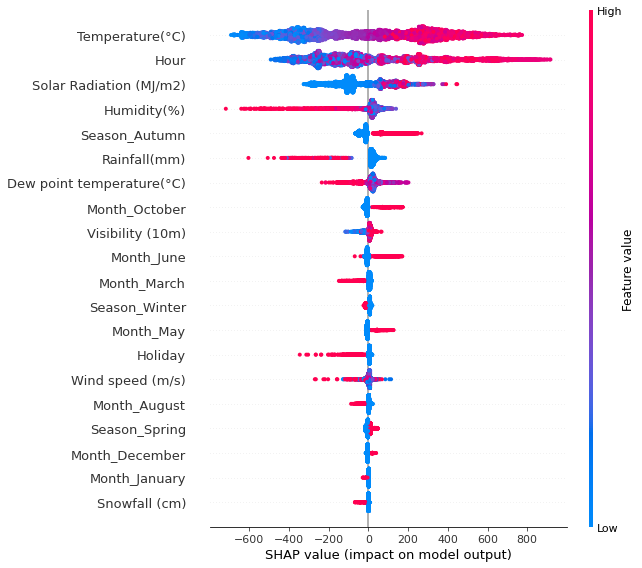

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns,title='Feature Importance with SHAP values')
plt.savefig('shap1.png')